IGTI - Instituto de Gestão e Tecnologia da Informação

Pós-Graduação MBA em Inovação e Gestão Ágil de Projetos

PROJETO APLICADO

Aluna: Lilian Campos Soares

Matrícula: 304357

Este notebook é referente aos códigos elaborados em Python na SPRINT 2 do Projeto Aplicado.

In [1]:
#Carregamento de bibliotecas gerais
import pandas as pd 
import numpy as np
import seaborn as sns
import shutil
import os
import io
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Definindo o diretório de trabalho
#os.chdir("C:/IGTI/csv")
os.chdir(r"/home/anaconda/Acidentes")

In [3]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [4]:
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [5]:
#Carga da base tratada
datatran = pd.read_csv(r"datatran.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory=False, parse_dates = ['data_inversa'])
acidentes = pd.read_csv(r"acidentes.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory=False, parse_dates = ['data_inversa'])

In [6]:
datatran.columns

Index(['index', 'id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos'], dtype='object')

In [7]:
acidentes.columns

Index(['index', 'id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos'], dtype='object')

In [8]:
datatran.drop(columns=['index'], axis=1, inplace=True)
acidentes.drop(columns=['index'], axis=1, inplace=True)

1a Seção - Scripts para a seleção de dados para a UF do programa de concessão definido

In [9]:
#Seleção dos dados da UF do Paraná
datatran_pr = datatran[datatran.uf == 'PR']
datatran_pr.reset_index(inplace=True)

In [10]:
#Seleção dos dados da UF do Paraná
acidentes_pr = acidentes[acidentes.uf == 'PR']
acidentes_pr.reset_index(inplace=True)

In [11]:
datatran_pr.shape

(190544, 25)

In [12]:
acidentes_pr.shape

(403891, 26)

In [13]:
datatran_pr.head()

,index,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,35,1035588.0,2012-01-01,domingo,16:25:00,PR,369,157.3,LONDRINA,Não guardar distância de segurança,Colisão lateral,Sem Vítimas,Pleno dia,Sol,Dupla,Reta,Urbano,3,0,0,0,2,1,0,2
1,38,1035592.0,2012-01-01,domingo,06:40:00,PR,369,157.8,LONDRINA,Ingestão de álcool,Colisão lateral,Sem Vítimas,Pleno dia,Sol,Dupla,Reta,Urbano,2,0,0,0,2,0,0,2
2,42,1035599.0,2012-01-01,domingo,11:20:00,PR,369,149,LONDRINA,Falta de atenção,Colisão traseira,Sem Vítimas,Pleno dia,Sol,Dupla,Cruzamento,Urbano,3,0,0,0,3,0,0,3
3,45,1035602.0,2012-01-01,domingo,18:15:00,PR,116,16,CAMPINA GRANDE DO SUL,Velocidade incompatível,Saída de pista,Sem Vítimas,Pleno dia,Chuva,Dupla,Curva,Urbano,1,0,0,0,1,0,0,1
4,48,1035605.0,2012-01-01,domingo,16:15:00,PR,369,201.3,APUCARANA,Ultrapassagem indevida,Colisão transversal,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples,Cruzamento,Urbano,3,0,1,1,1,0,2,2


In [14]:
datatran_pr.tail()

,index,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
190539,1851357,999918.0,2011-10-27,quinta-feira,00:35:00,PR,376,664.2,GUARATUBA,Velocidade incompatível,Colisão traseira,Sem Vítimas,Plena noite,Nublado,Dupla,Curva,Urbano,2,0,0,0,2,0,0,2
190540,1851379,999940.0,2011-10-28,sexta-feira,18:20:00,PR,376,618,SAO JOSE DOS PINHAIS,Falta de atenção,Colisão lateral,Sem Vítimas,Pleno dia,Sol,Simples,Curva,Urbano,2,0,0,0,2,0,0,2
190541,1851388,999949.0,2011-10-28,sexta-feira,07:50:00,PR,277,4,FOZ DO IGUACU,Falta de atenção,Colisão transversal,Com Vítimas Feridas,Pleno dia,Céu Claro,Dupla,Reta,Urbano,3,0,1,0,2,0,1,2
190542,1851408,999970.0,2011-10-28,sexta-feira,21:00:00,PR,376,118.3,ALTO PARANA,Falta de atenção,Colisão traseira,Sem Vítimas,Plena noite,Céu Claro,Simples,Reta,Rural,2,0,0,0,2,0,0,2
190543,1851433,999997.0,2011-10-28,sexta-feira,18:50:00,PR,376,672,GUARATUBA,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,Céu Claro,Dupla,Reta,Rural,2,0,0,0,2,0,0,2


In [15]:
acidentes_pr.head()

,index,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_leves,feridos_graves,mortos
0,0,8.0,1.0,2017-01-01,domingo,00:00:00,PR,376,112,PARANAVAI,Fenômenos da natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena noite,Chuva,Simples,Reta,Rural,Motocicleta,Condutor,Lesões Graves,Masculino,0.0,0.0,1.0,0.0
1,2,11.0,3.0,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,0.0,1.0,0.0,0.0
2,3,11.0,2.0,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Feminino,0.0,1.0,0.0,0.0
3,24,20.0,1540.0,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Automóvel,Condutor,Morto,Masculino,0.0,0.0,0.0,1.0
4,25,20.0,1541.0,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Sem Vítimas,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Caminhão,Condutor,Ileso,Masculino,1.0,0.0,0.0,0.0


In [16]:
acidentes_pr.tail()

,index,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_leves,feridos_graves,mortos
403886,3948467,8.3384e+07,8.3480e+07,2015-07-08,sexta-feira,14:00:00,PR,376,633,SAO JOSE DOS PINHAIS,Falta de atenção,Colisão lateral,Sem Vítimas,Pleno dia,Sol,Dupla,Reta,Rural,Caminhão,Condutor,Ileso,Masculino,1.0,0.0,0.0,0.0
403887,3948514,8.3384e+07,8.3480e+07,2015-07-08,sexta-feira,13:50:00,PR,369,174.1,ROLANDIA,Falta de atenção,Colisão transversal,Sem Vítimas,Pleno dia,Céu Claro,Simples,Reta,Urbano,Caminhonete,Condutor,Ileso,Masculino,1.0,0.0,0.0,0.0
403888,3948515,8.3384e+07,8.3480e+07,2015-07-08,sexta-feira,13:50:00,PR,369,174.1,ROLANDIA,Falta de atenção,Colisão transversal,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples,Reta,Urbano,Motoneta,Condutor,Lesões Leves,Masculino,0.0,1.0,0.0,0.0
403889,3948526,8.3384e+07,8.3480e+07,2015-07-08,sexta-feira,15:40:00,PR,369,468,CORBELIA,Outras,Colisão com objeto estático,Sem Vítimas,Pleno dia,Sol,Simples,Reta,Rural,Automóvel,Condutor,Ileso,Feminino,1.0,0.0,0.0,0.0
403890,3948527,8.3384e+07,8.3480e+07,2015-04-08,terça-feira,01:00:00,PR,376,341,ORTIGUEIRA,Ingestão de álcool,Tombamento,Com Vítimas Feridas,Plena noite,Céu Claro,Simples,Curva,Rural,Caminhão-trator,Condutor,Lesões Leves,Masculino,0.0,1.0,0.0,0.0


In [ ]:
#Criando o dataset com dados da UF do Paraná
datatran_pr.to_csv(r"datatran_pr.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')
acidentes_pr.to_csv(r"acidentes_pr.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

2a Seção - Scripts para a análise e exploração dos dados de acidentes da UF definida

In [5]:
#datatran_pr = pd.read_csv(r"datatran_pr.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory=False, parse_dates = ['data_inversa'])
#acidentes_pr = pd.read_csv(r"acidentes_pr.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory=False, parse_dates = ['data_inversa'])

In [6]:
#Exploração dos dados de acidentes da UF definida
Quantidade_acidentes = datatran_pr.shape[0]
print("Acidentes no Paraná (2007 a 2020): " + str(Quantidade_acidentes))

Acidentes no Paraná (2007 a 2020): 190544


In [7]:
datatran_pr['data_inversa'] = datatran_pr.data_inversa.astype('datetime64')
Acidentes_por_ano = datatran_pr.groupby(datatran_pr['data_inversa'].dt.strftime('%Y'))['id'].count()
print("Acidentes por ano no Paraná (2007 a 2020): " + str(Acidentes_por_ano))

Acidentes por ano no Paraná (2007 a 2020): data_inversa
2007     7074
2008     9684
2009    15609
2010    20986
2011    22189
2012    20749
2013    19789
2014    17178
2015    12792
2016    11032
2017    10674
2018     7946
2019     7696
2020     7146
Name: id, dtype: int64


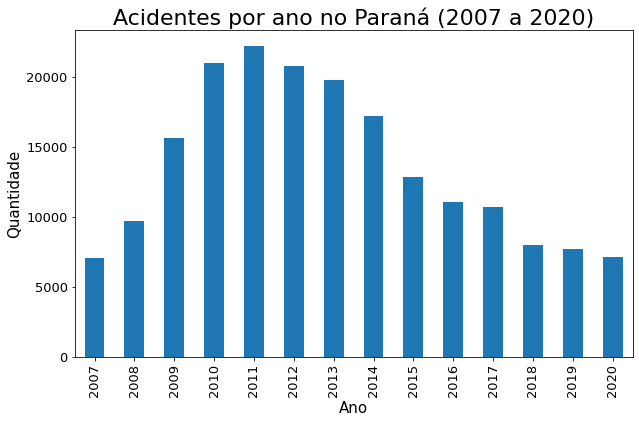

In [8]:
ax = Acidentes_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Acidentes por ano no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
plt.show()

In [9]:
Total_de_feridos = datatran_pr['feridos'].sum()
print("Feridos em acidentes no Paraná (2007 a 2020): " + str(Total_de_feridos))

Feridos em acidentes no Paraná (2007 a 2020): 132152


In [10]:
Feridos_por_ano = datatran_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano')]).agg({'feridos': 'sum'})
print("Feridos em acidentes por ano no Paraná (2007 a 2020): " + str(Feridos_por_ano))

Feridos em acidentes por ano no Paraná (2007 a 2020):       feridos
Ano          
2007     5372
2008     5457
2009     8536
2010    11445
2011    12454
2012    12299
2013    11565
2014    11406
2015    10015
2016     9792
2017     9504
2018     8339
2019     8548
2020     7420


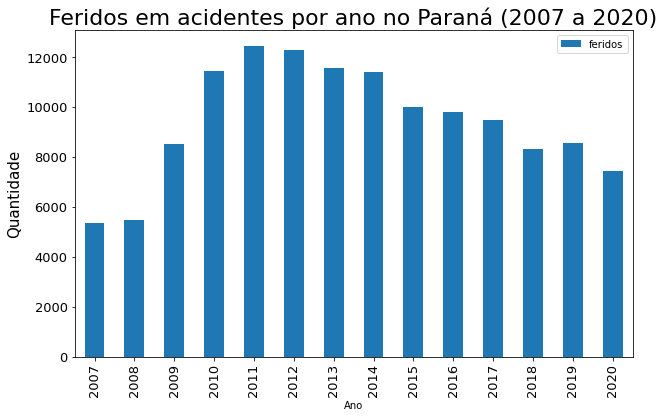

In [11]:
ax = Feridos_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Feridos em acidentes por ano no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
plt.show()

In [12]:
Total_de_mortos = datatran_pr['mortos'].sum()
print("Mortos em acidentes no Paraná (2007 a 2020): " + str(Total_de_mortos))

Mortos em acidentes no Paraná (2007 a 2020): 8397


In [13]:
Mortos_por_ano = datatran_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano')]).agg({'mortos': 'sum'})
print("Mortos em acidentes por ano no Paraná (2007 a 2020): " + str(Mortos_por_ano))

Mortos em acidentes por ano no Paraná (2007 a 2020):       mortos
Ano         
2007     333
2008     292
2009     558
2010     723
2011     740
2012     855
2013     750
2014     778
2015     584
2016     652
2017     612
2018     494
2019     500
2020     526


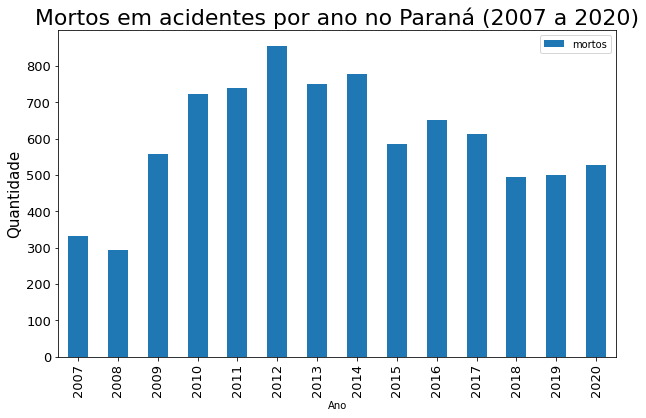

In [14]:
ax = Mortos_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Mortos em acidentes por ano no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
plt.show()

In [15]:
Quantidade_pessoas = datatran_pr['pessoas'].sum()
Quantidade_veiculos = datatran_pr['veiculos'].sum()
print("Envolvidos em acidentes no Paraná (2007 a 2020): \n Pessoas: " + str(Quantidade_pessoas) + "\n " + "Veículos envolvidos: " + str(Quantidade_veiculos))

Envolvidos em acidentes no Paraná (2007 a 2020): 
 Pessoas: 414736
 Veículos envolvidos: 327719


In [16]:
Quantidade_pessoas_por_ano = datatran_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano')]).agg({'pessoas': 'sum'})
print("Pessoas envolvidas em acidentes por ano no Paraná (2007 a 2020): " + str(Quantidade_pessoas_por_ano))
Quantidade_veiculos_por_ano = datatran_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano')]).agg({'veiculos': 'sum'})
print("Veículos envolvidos em acidentes por ano no Paraná (2007 a 2020): " + str(Quantidade_veiculos_por_ano))

Pessoas envolvidas em acidentes por ano no Paraná (2007 a 2020):       pessoas
Ano          
2007    14855
2008    19417
2009    31926
2010    44087
2011    48588
2012    45222
2013    43963
2014    37792
2015    28306
2016    24432
2017    23789
2018    18266
2019    18231
2020    15862
Veículos envolvidos em acidentes por ano no Paraná (2007 a 2020):       veiculos
Ano           
2007     11729
2008     16470
2009     26751
2010     36643
2011     39345
2012     37024
2013     35283
2014     30119
2015     21456
2016     17997
2017     17241
2018     13129
2019     12944
2020     11588


In [17]:
Estado_fisico = acidentes_pr.groupby(['estado_fisico']).size()
print("Estado físico dos envolvidos no Paraná (2007 a 2020): " + str(Estado_fisico))

Estado físico dos envolvidos no Paraná (2007 a 2020): estado_fisico
Ileso            251356
Lesões Graves     31064
Lesões Leves      96505
Morto              8060
Não Informado     16906
dtype: int64


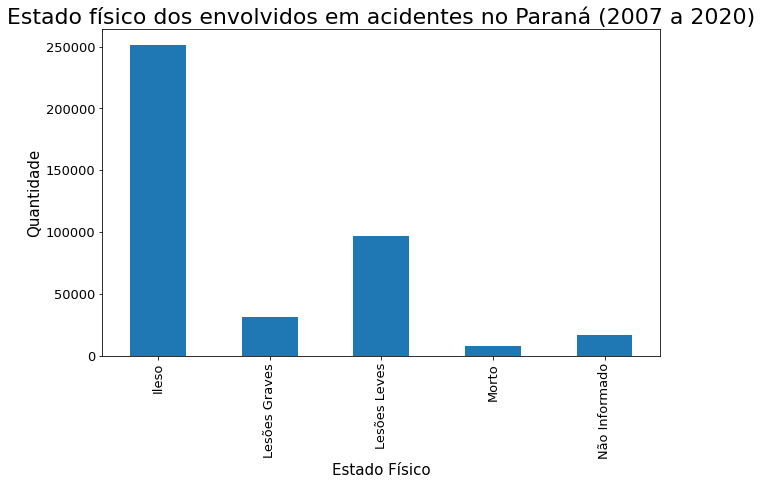

In [18]:
ax = Estado_fisico.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Estado Físico", fontsize=15);
plt.show()

In [19]:
acidentes_pr['data_inversa'] = acidentes_pr.data_inversa.astype('datetime64')
Estado_fisico_por_ano = acidentes_pr.groupby([acidentes_pr['data_inversa'].dt.year.rename('Ano'), acidentes_pr['estado_fisico']]).agg({'id': 'count'})
print("Estado físico dos envolvidos por ano no Paraná (2007 a 2020): " + str(Estado_fisico_por_ano))

Estado físico dos envolvidos por ano no Paraná (2007 a 2020):                        id
Ano  estado_fisico       
2007 Ileso           8773
     Lesões Graves   1274
     Lesões Leves    4103
     Morto            347
     Não Informado    376
2008 Ileso          12961
     Lesões Graves   1369
     Lesões Leves    4091
     Morto            293
     Não Informado    706
2009 Ileso          21640
     Lesões Graves   2211
     Lesões Leves    6325
     Morto            558
     Não Informado   1192
2010 Ileso          30357
     Lesões Graves   2691
     Lesões Leves    8752
     Morto            722
     Não Informado   1559
2011 Ileso          33570
     Lesões Graves   2838
     Lesões Leves    9611
     Morto            740
     Não Informado   1821
2012 Ileso          30384
     Lesões Graves   3056
     Lesões Leves    9241
     Morto            855
     Não Informado   1682
2013 Ileso          29810
     Lesões Graves   2783
     Lesões Leves    8779
     Morto            750
  

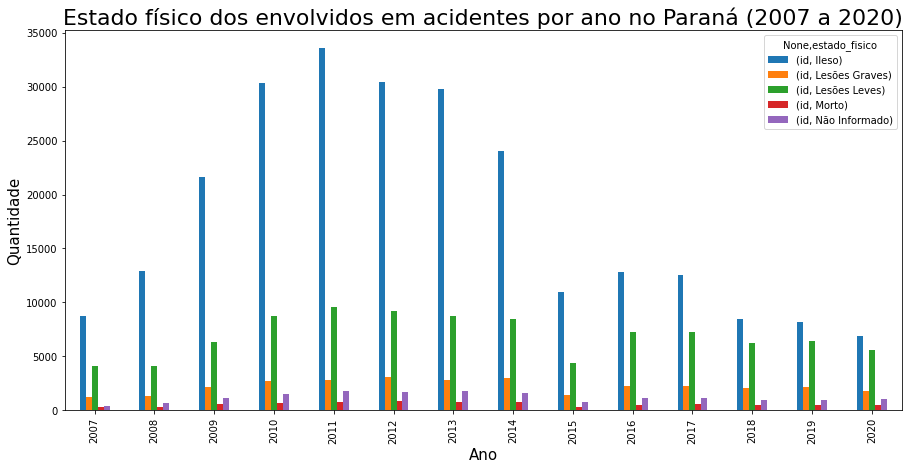

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_pr.groupby([acidentes_pr['data_inversa'].dt.year.rename('Ano'), acidentes_pr['estado_fisico']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes por ano no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

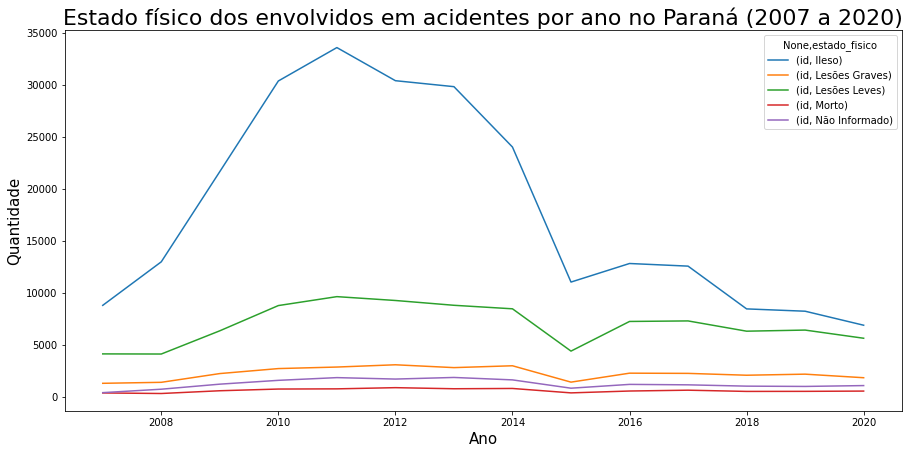

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_pr.groupby([acidentes_pr['data_inversa'].dt.year.rename('Ano'), acidentes_pr['estado_fisico']]).agg({'id': 'count'}).unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes por ano no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [22]:
Classificacao_de_acidentes = datatran_pr.groupby(['classificacao_acidente']).size()
print("Classificação de acidentes no Paraná (2007 a 2020): " + str(Classificacao_de_acidentes))

Classificação de acidentes no Paraná (2007 a 2020): classificacao_acidente
Com Vítimas Fatais      7040
Com Vítimas Feridas    86219
Sem Vítimas            97285
dtype: int64


In [23]:
perc_cvfat = (datatran_pr['id'][datatran_pr['classificacao_acidente'] == 'Com Vítimas Fatais'].count() / Quantidade_acidentes) *100
perc_cvfer = (datatran_pr['id'][datatran_pr['classificacao_acidente'] == 'Com Vítimas Feridas'].count() / Quantidade_acidentes) *100
perc_sviti = (datatran_pr['id'][datatran_pr['classificacao_acidente'] == 'Sem Vítimas'].count() / Quantidade_acidentes) *100
perc_cigno = (datatran_pr['id'][datatran_pr['classificacao_acidente'] == 'Ignorado'].count() / Quantidade_acidentes) *100
perc_null = (datatran_pr['id'][datatran_pr['classificacao_acidente'] == None].count() / Quantidade_acidentes) *100
perc_zero = (datatran_pr['id'][datatran_pr['classificacao_acidente'] == '0'].count() / Quantidade_acidentes) *100
print("% Classificação de acidentes no Paraná (2007 a 2020): \n Com Vítimas Fatais " + "%.2f" % perc_cvfat + "\n Com Vítimas Feridas " + "%.2f" % perc_cvfer + "\n Sem Vítimas " + "%.2f" % perc_sviti)
print(" Ignorado " + "%.2f" % perc_cigno + "\n Nullos " + "%.2f" % perc_null + "\n Zero " + "%.2f" % perc_zero)

% Classificação de acidentes no Paraná (2007 a 2020): 
 Com Vítimas Fatais 3.69
 Com Vítimas Feridas 45.25
 Sem Vítimas 51.06
 Ignorado 0.00
 Nullos 0.00
 Zero 0.00


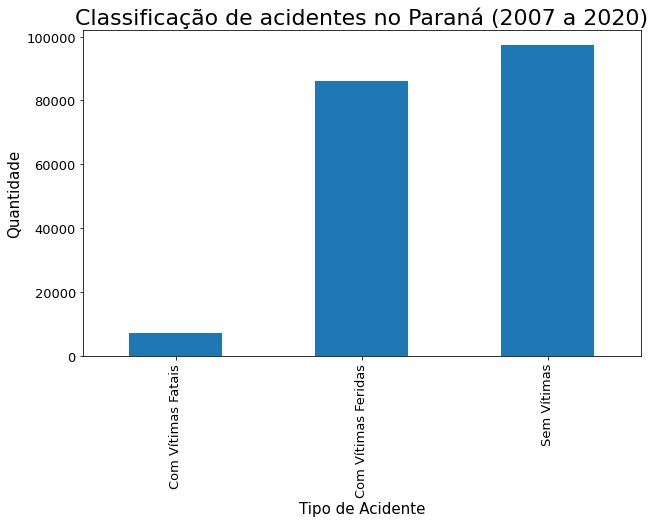

In [24]:
ax = Classificacao_de_acidentes.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Tipo de Acidente", fontsize=15);
plt.show()

In [25]:
Classificacao_de_acidentes_por_ano = datatran_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano'), datatran_pr['classificacao_acidente']]).agg({'id': 'count'})
print("Classificação de acidentes por ano no Paraná (2007 a 2020): " + str(Classificacao_de_acidentes_por_ano))

Classificação de acidentes por ano no Paraná (2007 a 2020):                                 id
Ano  classificacao_acidente       
2007 Com Vítimas Fatais        263
     Com Vítimas Feridas      3220
     Sem Vítimas              3591
2008 Com Vítimas Fatais        250
     Com Vítimas Feridas      3535
     Sem Vítimas              5899
2009 Com Vítimas Fatais        461
     Com Vítimas Feridas      5302
     Sem Vítimas              9846
2010 Com Vítimas Fatais        614
     Com Vítimas Feridas      7369
     Sem Vítimas             13003
2011 Com Vítimas Fatais        629
     Com Vítimas Feridas      8040
     Sem Vítimas             13520
2012 Com Vítimas Fatais        686
     Com Vítimas Feridas      7937
     Sem Vítimas             12126
2013 Com Vítimas Fatais        631
     Com Vítimas Feridas      7454
     Sem Vítimas             11704
2014 Com Vítimas Fatais        638
     Com Vítimas Feridas      7378
     Sem Vítimas              9162
2015 Com Vítimas Fatais       

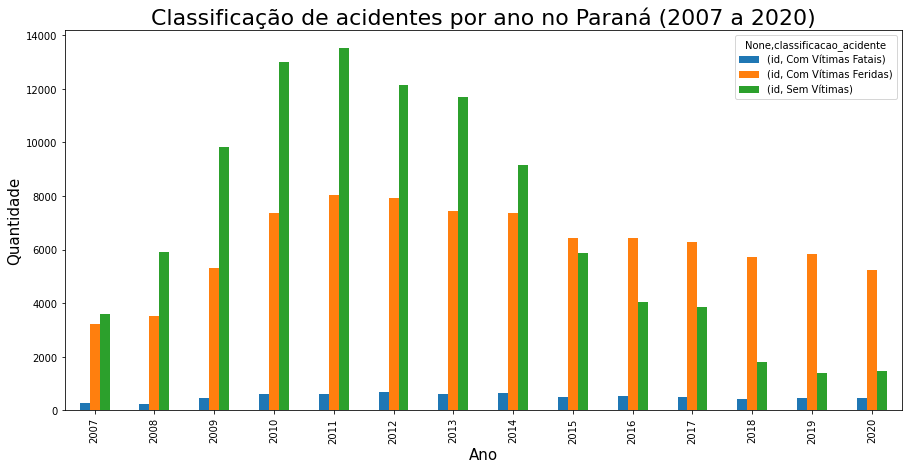

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
datatran_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano'), datatran_pr['classificacao_acidente']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes por ano no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

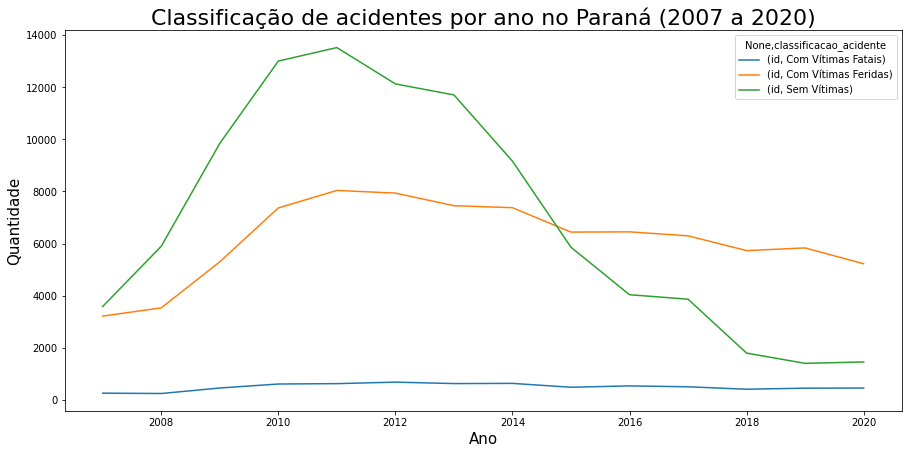

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano'), datatran_pr['classificacao_acidente']]).agg({'id': 'count'}).unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes por ano no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [28]:
Acidentes_por_dia_semana = datatran_pr.groupby(['dia_semana']).size().sort_values(ascending=False)
print("Acidentes por dia da semana no Paraná (2007 a 2020): " + str(Acidentes_por_dia_semana))

Acidentes por dia da semana no Paraná (2007 a 2020): dia_semana
sábado           31462
sexta-feira      30859
domingo          27970
quinta-feira     26162
segunda-feira    25155
quarta-feira     24950
terça-feira      23986
dtype: int64


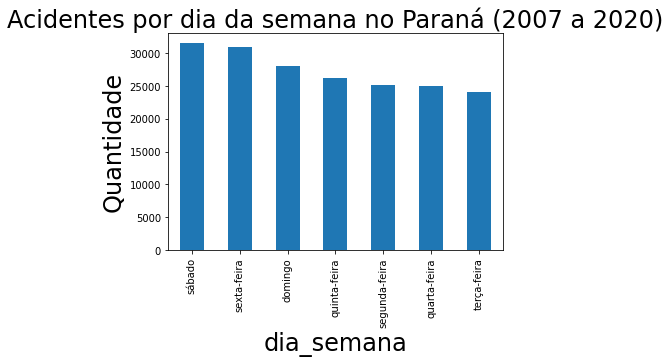

In [29]:
plt.title('Acidentes por dia da semana no Paraná (2007 a 2020)', fontsize=24)
plt.ylabel('Quantidade', fontsize=24)
plt.xlabel("Dia da Semana", fontsize=24)
Acidentes_por_dia_semana.plot(kind='bar')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [30]:
Acidentes_por_dia_semana_por_ano = datatran_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano'), datatran_pr['dia_semana']]).agg({'id': 'count'})
print("Acidentes por dia da semana por ano no Paraná (2007 a 2020): " + str(Acidentes_por_dia_semana_por_ano))

Acidentes por dia da semana por ano no Paraná (2007 a 2020):                       id
Ano  dia_semana         
2007 domingo        1100
     quarta-feira    944
     quinta-feira    908
     segunda-feira   887
     sexta-feira    1147
     sábado         1180
     terça-feira     908
2008 domingo        1352
     quarta-feira   1353
     quinta-feira   1257
     segunda-feira  1179
     sexta-feira    1580
     sábado         1706
     terça-feira    1257
2009 domingo        2194
     quarta-feira   2022
     quinta-feira   2214
     segunda-feira  2003
     sexta-feira    2521
     sábado         2650
     terça-feira    2005
2010 domingo        3017
     quarta-feira   2758
     quinta-feira   2815
     segunda-feira  2856
     sexta-feira    3531
     sábado         3416
     terça-feira    2593
2011 domingo        3179
     quarta-feira   2855
     quinta-feira   3116
     segunda-feira  2898
     sexta-feira    3611
     sábado         3678
     terça-feira    2852
2012 domingo  

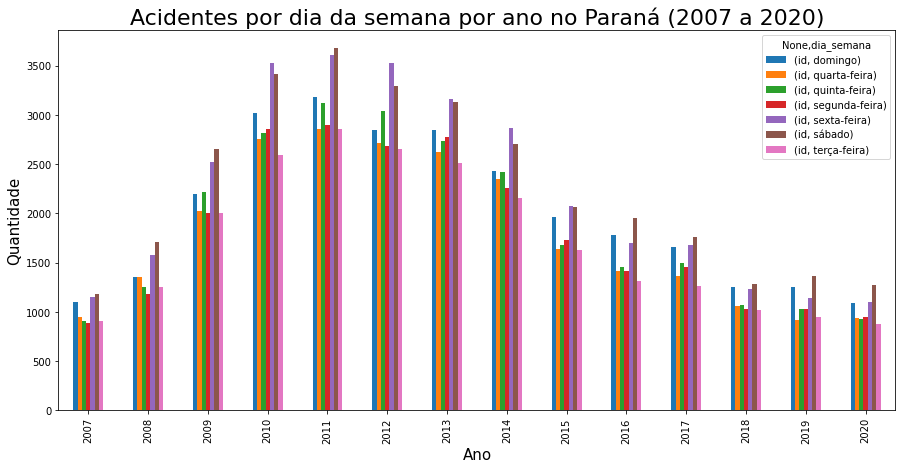

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
datatran_pr.groupby([datatran_pr['data_inversa'].dt.year.rename('Ano'), datatran_pr['dia_semana']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Acidentes por dia da semana por ano no Paraná (2007 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [32]:
datatran_pr.data_inversa = pd.to_datetime(datatran_pr.data_inversa)
Acidentes_por_mes = datatran_pr.groupby(datatran_pr['data_inversa'].dt.strftime('%B'))['id'].count().sort_values(ascending=False)
print("Acidentes por mês no Paraná (2007 a 2020): " + str(Acidentes_por_mes))

Acidentes por mês no Paraná (2007 a 2020): data_inversa
December     17773
July         16428
May          16093
October      16090
August       16058
September    15922
June         15747
March        15607
November     15598
January      15465
April        15254
February     14509
Name: id, dtype: int64


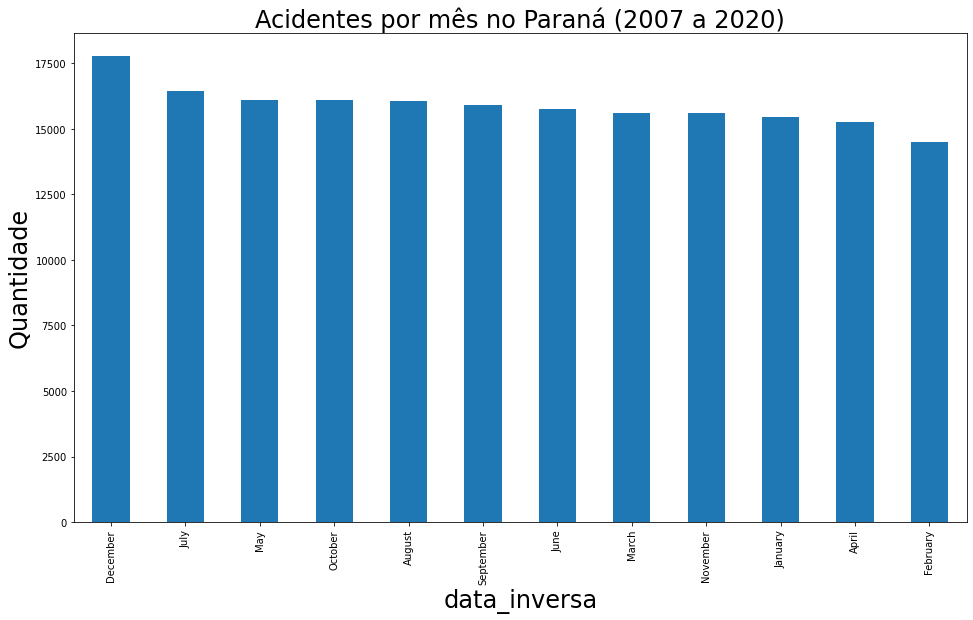

In [33]:
plt.title('Acidentes por mês no Paraná (2007 a 2020)', fontsize=24)
plt.ylabel('Quantidade', fontsize=24)
plt.xlabel('Mês', fontsize=24)
Acidentes_por_mes.plot(kind='bar')
plt.rcParams["figure.figsize"] = [32,18]
plt.show()

In [34]:
Acidentes_por_tipo_veiculo = acidentes_pr.groupby(['tipo_veiculo']).size().sort_values(ascending=False)
print("Tipo de veículos (2007 a 2020): " + str(Acidentes_por_tipo_veiculo))

Tipo de veículos (2007 a 2020): tipo_veiculo
Automóvel            212000
Motocicleta           43022
Caminhão-trator       41210
Caminhão              33357
Caminhonete           27336
Camioneta             13428
Ônibus                10682
Não Informado          7972
Motoneta               4790
Bicicleta              3594
Microônibus            2724
Utilitário             2605
Semireboque             289
Outros                  217
Trator de rodas         184
Carroça                 102
Caminhão-tanque          99
Reboque                  61
Ciclomotor               58
Triciclo                 45
Bonde / Trem             29
Carro-de-mao             24
Carroça-charrete         17
Trem-bonde               15
Trator misto             14
Charrete                  7
Trator de esteira         7
Quadriciclo               2
Chassi-plataforma         1
dtype: int64


In [35]:
Acidentes_por_causa = datatran_pr.groupby(['causa_acidente']).size().sort_values(ascending=False)
print("Acidentes por causa no Paraná (2007 a 2020): " + str(Acidentes_por_causa))

Acidentes por causa no Paraná (2007 a 2020): causa_acidente
Falta de atenção                                                                  55977
Outras                                                                            32156
Velocidade incompatível                                                           27378
Não guardar distância de segurança                                                16705
Falta de atenção à condução                                                       12840
Ingestão de álcool                                                                11301
Desobediência à sinalização                                                        8106
Defeito mecânico em veículo                                                        7924
Desobediência às normas de trânsito pelo condutor                                  3387
Ultrapassagem indevida                                                             3200
Dormindo                                                    

In [36]:
Acidentes_por_tipo = datatran_pr.groupby(['tipo_acidente']).size().sort_values(ascending=False)
print("Acidentes por tipo no Paraná (2007 a 2020): " + str(Acidentes_por_tipo))

Acidentes por tipo no Paraná (2007 a 2020): tipo_acidente
Colisão traseira                              49326
Colisão lateral                               26131
Saída de pista                                25285
Colisão transversal                           23247
Colisão com objeto estático                   12467
Capotamento                                    9072
Tombamento                                     8151
Queda de motocicleta / bicicleta / veículo     6807
Colisão frontal                                6696
Atropelamento de pessoa                        6635
Saída de leito carroçável                      6288
Queda de ocupante de veículo                   2022
Atropelamento de animal                        1896
Colisão com bicicleta                          1684
Colisão com objeto em movimento                1446
Derramamento de carga                          1132
Incêndio                                        954
Danos eventuais                                 845
Engave

In [37]:
Acidentes_por_fase_do_dia = datatran_pr.groupby(['fase_dia']).size().sort_values(ascending=False)
print("Acidentes por fase do dia no Paraná (2007 a 2020): " + str(Acidentes_por_fase_do_dia))

Acidentes por fase do dia no Paraná (2007 a 2020): fase_dia
Pleno dia        108265
Plena noite       61698
Anoitecer         11492
Amanhecer          9080
Não Informado         9
dtype: int64


In [38]:
Acidentes_por_condi_met = datatran_pr.groupby(['condicao_metereologica']).size().sort_values(ascending=False)
print("Acidentes por fase do dia no Paraná (2007 a 2020): " + str(Acidentes_por_condi_met))

Acidentes por fase do dia no Paraná (2007 a 2020): condicao_metereologica
Céu Claro           85948
Chuva               37437
Nublado             37402
Sol                 19415
Nevoeiro/neblina     4181
Não Informado        3731
Garoa/chuvisco       1761
Vento                 613
Granizo                42
Neve                   14
dtype: int64


In [39]:
Acidentes_por_tipo_de_pista = datatran_pr.groupby(['tipo_pista']).size().sort_values(ascending=False)
print("Acidentes por tipo de pista no Paraná (2007 a 2020): " + str(Acidentes_por_tipo_de_pista))

Acidentes por tipo de pista no Paraná (2007 a 2020): tipo_pista
Dupla            102517
Simples           77609
Múltipla          10417
Não Informado         1
dtype: int64


In [40]:
Acidentes_por_tracado_da_via = datatran_pr.groupby(['tracado_via']).size().sort_values(ascending=False)
print("Acidentes por tipo de traçado no Paraná (2007 a 2020): " + str(Acidentes_por_tracado_da_via))

Acidentes por tipo de traçado no Paraná (2007 a 2020): tracado_via
Reta                     127123
Curva                     44272
Cruzamento                10689
Não Informado              4463
Interseção de vias         1925
Desvio Temporário           916
Rotatória                   506
Retorno Regulamentado       386
Viaduto                     181
Ponte                        63
Túnel                        20
dtype: int64


In [41]:
Acidentes_por_br = datatran_pr.groupby(['br']).size().sort_values(ascending=False)
print("Acidentes por BR no Paraná (2007 a 2020): " + str(Acidentes_por_br))

Acidentes por BR no Paraná (2007 a 2020): br
277    50786
376    47360
116    27270
476    22194
369    17250
163     6171
153     5810
373     4323
158     3077
467     2193
272     1670
487     1045
469      799
280      577
7          6
120        6
490        1
0          1
349        1
423        1
380        1
140        1
759        1
dtype: int64


In [42]:
Acidentes_por_sexo_envolvido = acidentes_pr.groupby(['sexo']).size().sort_values(ascending=False)
print("Acidentes por sexo dos envolvidos no Paraná (2007 a 2020): " + str(Acidentes_por_sexo_envolvido))

Acidentes por sexo dos envolvidos no Paraná (2007 a 2020): sexo
Masculino        309192
Feminino          77121
Não Informado     17578
dtype: int64


In [43]:
Acidentes_por_sexo_e_envolvido = acidentes_pr.groupby(['tipo_envolvido','sexo']).size()
print("Acidentes por sexo por envolvido no Paraná (2007 a 2020): " + str(Acidentes_por_sexo_e_envolvido))

Acidentes por sexo por envolvido no Paraná (2007 a 2020): tipo_envolvido  sexo         
Cavaleiro       Feminino              4
                Masculino            43
                Não Informado         1
Condutor        Feminino          33582
                Masculino        271869
                Não Informado     14634
Passageiro      Feminino          41768
                Masculino         32407
                Não Informado      1198
Pedestre        Feminino           1767
                Masculino          4873
                Não Informado       110
Testemunha      Não Informado      1635
dtype: int64
